In [1]:
from preprocess import preprocess
import seaborn as sns
import matplotlib.pyplot as plt
df = preprocess()

&lt;seaborn.axisgrid.FacetGrid at 0x17c4e7d17c0&gt;

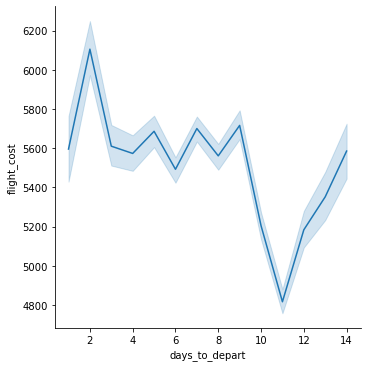

In [8]:
sns.relplot(data=df, x='days_to_depart', y='flight_cost', kind="line")

&lt;matplotlib.axes._subplots.AxesSubplot at 0x18d16f81850&gt;

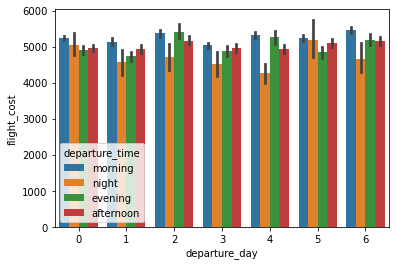

In [4]:
sns.barplot(data=df, x='departure_day', y='flight_cost', hue='departure_time')

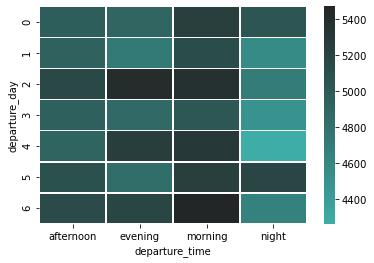

In [25]:

temp = df.pivot_table(index='departure_day', columns='departure_time', values='flight_cost', aggfunc='mean')
t = sns.dark_palette("#3eada7", reverse=True, as_cmap=True)
sns.heatmap(temp, linewidths=.5, cmap=t)
plt.savefig('dep_day_time_heat.png')

&lt;matplotlib.axes._subplots.AxesSubplot at 0x17c52bbe970&gt;

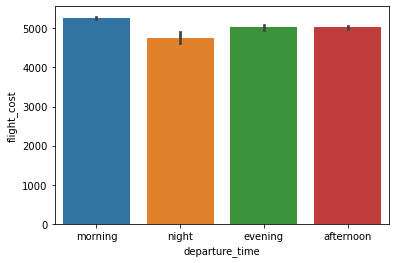

In [22]:
sns.barplot(data=df, x='departure_time', y='flight_cost')

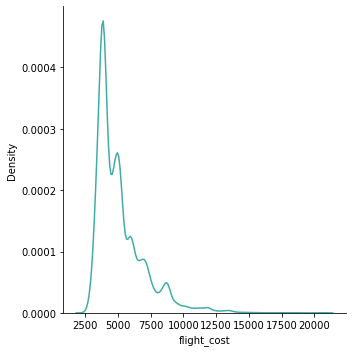

In [31]:

sns.displot(data=df, x='flight_cost', kind='kde', color="#3eada7")
plt.savefig('flight_cost.png')

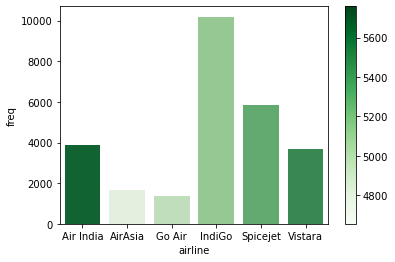

In [3]:
import pandas as pd
import numpy as np
from matplotlib.colors import Normalize
df.sort_values('flight_cost', inplace=True)
g = df.groupby('airline')
costs = g['flight_cost'].mean()
n = g.size()
plot = plt.scatter(n.index, n, c=costs, cmap='Greens')
plt.clf()
plt.colorbar(plot)
ax = sns.barplot(x=n.index, y=n, hue=costs, palette='Greens', dodge=False)
ax.set_ylabel('freq')
ax.legend_.remove()
plt.savefig('hist.png')
# sns.histplot(data=df, x = 'airline', hue=)
# df['cost'] = pd.cut(df['flight_cost'], np.arange(min(df['flight_cost']), max(df['flight_cost']), step=1000))
# sns.histplot(data=df, x= 'airline', hue='flight_cost', hue_norm=Normalize())

&lt;matplotlib.axes._subplots.AxesSubplot at 0x18d27208850&gt;

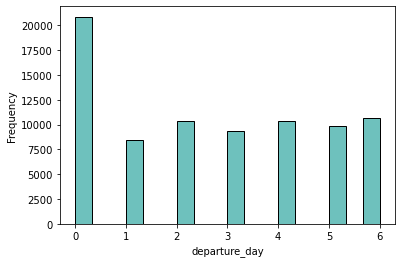

In [86]:
sns.histplot(data=df, x = 'departure_day', stat='frequency', color="#3eada7")

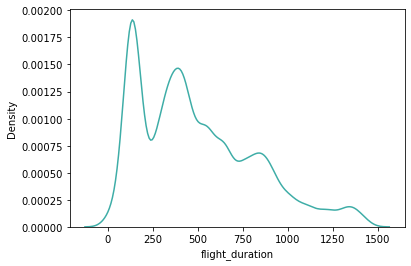

In [88]:
sns.kdeplot(df['flight_duration'], color = "#3eada7")
plt.savefig('duration_kde.png')

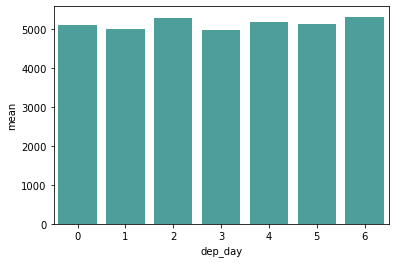

In [21]:
t = df[['airline', 'flight_path', 'days_to_depart', 'flight_cost', 'number_of_stops', 'departure_day']]
t = t.groupby('departure_day')
x = t.describe()
x = x['flight_cost']
x['dep_day'] = [0,1,2,3,4,5,6]

sns.barplot(data=x, x='dep_day', y='mean', color = '#3eada7')

# sns.displot(t, x="flight_path", shrink=0.8, color='#3eada7')
# plt.xticks(rotation=90)
# plt.savefig('route_count.png')
# # t.corr()
# sns.heatmap(.corr())

In [26]:
from pandas_profiling import ProfileReport
t = df[['airline', 'flight_path', 'departure_day', 'number_of_stops', 'flight_duration', 'days_to_depart', 'flight_cost', ]]
prof = ProfileReport(t)
prof.to_file(output_file='output1.html')

In [27]:
temp = df.loc[:,['flight_path','airline','departure_time_day','booking_day','departure_day','departure_time','flight_cost','number_of_stops']]
temp['flight_path']=temp['flight_path'].astype('category').cat.codes
temp['airline']=temp['airline'].astype('category').cat.codes
temp['departure_time_day']=temp['departure_time_day'].astype('category').cat.codes
temp['departure_time']=temp['departure_time'].astype('category').cat.codes
prof = ProfileReport(temp)
prof.to_file(output_file='output3.html')

In [4]:
df

,Air India,AirAsia,Go Air,IndiGo,Spicejet,Vistara,airline,flight_code,departure_time,flight_duration,...,morning-4,morning-5,morning-6,night-0,night-1,night-2,night-3,night-4,night-5,night-6
981,0,0,1,0,0,0,Go Air,G8-101 | G8-185,morning,210.0,...,0,0,0,0,0,0,0,0,0,0
1180,0,0,1,0,0,0,Go Air,G8-113 | G8-832,morning,860.0,...,0,0,0,0,0,0,0,0,0,0
1179,0,0,1,0,0,0,Go Air,G8-101 | G8-185,morning,210.0,...,0,0,0,0,0,0,0,0,0,0
3760,0,0,1,0,0,0,Go Air,G8-141,morning,80.0,...,0,1,0,0,0,0,0,0,0,0
4548,0,0,1,0,0,0,Go Air,G8-371,afternoon,80.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2869,0,0,0,0,0,1,Vistara,UK-705 | UK-772 | UK-940 | UK-855,morning,240.0,...,1,0,0,0,0,0,0,0,0,0
1046,1,0,0,0,0,0,Air India,AI-502,evening,165.0,...,0,0,0,0,0,0,0,0,0,0
1050,0,1,0,0,0,0,AirAsia,I5-741,afternoon,170.0,...,0,0,0,0,0,0,0,0,0,0
1485,0,0,0,0,0,1,Vistara,UK-812,afternoon,165.0,...,0,0,0,0,0,0,0,0,0,0


In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from preprocess import preprocess
data = preprocess()
data.to_csv(r'd.csv')
# train, test = train_test_split(data,test_size=0.3)
# model = RandomForestClassifier(n_estimators = 100)
# sel = SelectFromModel(model)
# x_train = train.drop('flight_cost', axis=1)
# y_train = train['flight_cost']
# sel.fit(x_train,y_train)
# x_train.columns[(sel.get_support())]

In [3]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)
feat_importances = pd.Series(model.feature_importances_, index=df.columns)



MemoryError: could not allocate 245628928 bytes

In [18]:
sel.feature_importances_
# importance = model.feature_importances_
# # summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()

AttributeError: 'SelectFromModel' object has no attribute 'feature_importances_'